In [54]:
from pprint import pprint
import networkx as nx
import pyreason as pr
import matplotlib.pyplot as plt

## Wine Ontology

In [ ]:
# Define more wine properties
wines = ['Cabernet Sauvignon', 'Chardonnay', 'Merlot', 'Pinot Noir', 
         'Sauvignon Blanc', 'Riesling', 
         'Malbec', 'Champagne']

wine_properties = {
    'Cabernet Sauvignon': {
        'type': 'Red',
        'region': 'California',
        'flavor_profile': ['Blackcurrant', 'Oak', 'Spice'],
        'aroma': ['Herbs', 'Vanilla'],
        'tannins': 'High',
        'acidity': 'Medium',
        'alcohol_content': '13.5%',
        'serving_temperature': '16-18°C',
        'food_pairing': ['Grilled meats', 'Steaks', 'Dark chocolate']
    },
    'Chardonnay': {
        'type': 'White',
        'region': 'Burgundy',
        'flavor_profile': ['Apple', 'Citrus', 'Vanilla'],
        'aroma': ['Peach', 'Butter'],
        'tannins': 'Low',
        'acidity': 'Medium',
        'alcohol_content': '13%',
        'serving_temperature': '10-12°C',
        'food_pairing': ['Seafood', 'Chicken', 'Pasta']
    },
    'Merlot': {
        'type': 'Red',
        'region': 'Bordeaux',
        'flavor_profile': ['Plum', 'Chocolate', 'Blackberry'],
        'aroma': ['Vanilla', 'Cedar'],
        'tannins': 'Medium',
        'acidity': 'Medium',
        'alcohol_content': '14%',
        'serving_temperature': '16-18°C',
        'food_pairing': ['Pasta', 'Roasted vegetables', 'Lamb']
    },
    'Pinot Noir': {
        'type': 'Red',
        'region': 'Oregon',
        'flavor_profile': ['Cherry', 'Raspberry', 'Mushroom'],
        'aroma': ['Rose', 'Earth'],
        'tannins': 'Low',
        'acidity': 'High',
        'alcohol_content': '13%',
        'serving_temperature': '14-16°C',
        'food_pairing': ['Duck', 'Pork', 'Mushroom risotto']
    },
    'Sauvignon Blanc': {
        'type': 'White',
        'region': 'New Zealand',
        'flavor_profile': ['Lime', 'Green apple', 'Herbs'],
        'aroma': ['Gooseberry', 'Grass'],
        'tannins': 'None',
        'acidity': 'High',
        'alcohol_content': '12.5%',
        'serving_temperature': '8-10°C',
        'food_pairing': ['Salads', 'Goat cheese', 'Seafood']
    },
    'Riesling': {
        'type': 'White',
        'region': 'Germany',
        'flavor_profile': ['Peach', 'Apricot', 'Honey'],
        'aroma': ['Floral', 'Mineral'],
        'tannins': 'None',
        'acidity': 'High',
        'alcohol_content': '10-12%',
        'serving_temperature': '8-10°C',
        'food_pairing': ['Spicy food', 'Asian cuisine', 'Desserts']
    },
    'Malbec': {
        'type': 'Red',
        'region': 'Argentina',
        'flavor_profile': ['Black cherry', 'Plum', 'Cocoa'],
        'aroma': ['Vanilla', 'Oak'],
        'tannins': 'Medium to High',
        'acidity': 'Medium',
        'alcohol_content': '14%',
        'serving_temperature': '16-18°C',
        'food_pairing': ['Grilled meats', 'Steak', 'Hard cheese']
    },
    'Champagne': {
        'type': 'Sparkling',
        'region': 'Champagne',
        'flavor_profile': ['Apple', 'Citrus', 'Brioche'],
        'aroma': ['Toast', 'Floral'],
        'tannins': 'None',
        'acidity': 'High',
        'alcohol_content': '12%',
        'serving_temperature': '6-8°C',
        'food_pairing': ['Oysters', 'Caviar', 'Cheese']
    },
}

wine_properties


{'Cabernet Sauvignon': {'type': 'Red',
  'region': 'California',
  'flavor_profile': ['Blackcurrant', 'Oak', 'Spice'],
  'aroma': ['Herbs', 'Vanilla'],
  'tannins': 'High',
  'acidity': 'Medium',
  'alcohol_content': '13.5%',
  'serving_temperature': '16-18°C',
  'food_pairing': ['Grilled meats', 'Steaks', 'Dark chocolate']},
 'Chardonnay': {'type': 'White',
  'region': 'Burgundy',
  'flavor_profile': ['Apple', 'Citrus', 'Vanilla'],
  'aroma': ['Peach', 'Butter'],
  'tannins': 'Low',
  'acidity': 'Medium',
  'alcohol_content': '13%',
  'serving_temperature': '10-12°C',
  'food_pairing': ['Seafood', 'Chicken', 'Pasta']},
 'Merlot': {'type': 'Red',
  'region': 'Bordeaux',
  'flavor_profile': ['Plum', 'Chocolate', 'Blackberry'],
  'aroma': ['Vanilla', 'Cedar'],
  'tannins': 'Medium',
  'acidity': 'Medium',
  'alcohol_content': '14%',
  'serving_temperature': '16-18°C',
  'food_pairing': ['Pasta', 'Roasted vegetables', 'Lamb']},
 'Pinot Noir': {'type': 'Red',
  'region': 'Oregon',
  'flavo

In [56]:
# Define food items and their properties
food_items = {
    'Grilled Chicken': {
        'flavors': ['Savory', 'Herbaceous'],
        'recommended_wines': ['Chardonnay', 'Sauvignon Blanc']
    },
    'Steak': {
        'flavors': ['Rich', 'Savory'],
        'recommended_wines': ['Cabernet Sauvignon', 'Merlot']
    },
    'Seafood': {
        'flavors': ['Light', 'Fresh'],
        'recommended_wines': ['Chardonnay', 'Riesling']
    },
    'Pasta': {
        'flavors': ['Savory', 'Cheesy'],
        'recommended_wines': ['Chianti', 'Grenache']
    },
    'Salad': {
        'flavors': ['Fresh', 'Crisp'],
        'recommended_wines': ['Sauvignon Blanc', 'Rosé']
    },
    'BBQ Ribs': {
        'flavors': ['Smoky', 'Sweet'],
        'recommended_wines': ['Pinot Noir']
    },
    'Duck': {
        'flavors': ['Rich', 'Savory'],
        'recommended_wines': ['Pinot Noir', 'Merlot']
    },
    'Oysters': {
        'flavors': ['Briny', 'Fresh'],
        'recommended_wines': ['Champagne', 'Sauvignon Blanc']
    },
}

# Create a food dictionary for easy access
food_dict = {i: (food, food_items[food]) for i, food in enumerate(food_items)}

food_dict


{0: ('Grilled Chicken',
  {'flavors': ['Savory', 'Herbaceous'],
   'recommended_wines': ['Chardonnay', 'Sauvignon Blanc']}),
 1: ('Steak',
  {'flavors': ['Rich', 'Savory'],
   'recommended_wines': ['Cabernet Sauvignon', 'Merlot']}),
 2: ('Seafood',
  {'flavors': ['Light', 'Fresh'],
   'recommended_wines': ['Chardonnay', 'Riesling']}),
 3: ('Pasta',
  {'flavors': ['Savory', 'Cheesy'],
   'recommended_wines': ['Chianti', 'Grenache']}),
 4: ('Salad',
  {'flavors': ['Fresh', 'Crisp'],
   'recommended_wines': ['Sauvignon Blanc', 'Rosé']}),
 5: ('BBQ Ribs',
  {'flavors': ['Smoky', 'Sweet'], 'recommended_wines': ['Pinot Noir']}),
 6: ('Duck',
  {'flavors': ['Rich', 'Savory'],
   'recommended_wines': ['Pinot Noir', 'Merlot']}),
 7: ('Oysters',
  {'flavors': ['Briny', 'Fresh'],
   'recommended_wines': ['Champagne', 'Sauvignon Blanc']})}

In [57]:
# Define updated customer preferences based on the remaining wines
customer_preferences_updated = {
    'John': {
        'preferred_wines': ['Cabernet Sauvignon', 'Merlot'],
        'favorite_flavors': ['Blackcurrant', 'Plum'],
        'food_pairing': ['Steak', 'Grilled Chicken'] 
    },
    'Mary': {
        'preferred_wines': ['Chardonnay', 'Riesling'],
        'favorite_flavors': ['Apple', 'Peach'],
        'food_pairing': ['Seafood', 'Grilled Chicken']  
    },
    'Justin': {
        'preferred_wines': ['Pinot Noir', 'Malbec'],
        'favorite_flavors': ['Cherry', 'Black cherry'],
        'food_pairing': ['Duck', 'Pasta'] 
    },
    'Alice': {
        'preferred_wines': ['Sauvignon Blanc', 'Champagne'],
        'favorite_flavors': ['Lime', 'Apple'],
        'food_pairing': ['Salad', 'Oysters'] 
    },
    'Bob': {
        'preferred_wines': [], 
        'favorite_flavors': ['Blackberry', 'Raspberry'],
        'food_pairing': ['BBQ Ribs', 'Pasta']  
    },
    'Eva': {
        'preferred_wines': ['Chardonnay'],  
        'favorite_flavors': ['Peach', 'Strawberry'],
        'food_pairing': ['Pasta', 'Seafood']  
    },
    'Mike': {
        'preferred_wines': ['Merlot'],  
        'favorite_flavors': ['Chocolate', 'Leather'],
        'food_pairing': ['Duck', 'Steak']  
    },
}

# Create an updated customer dictionary
customer_dict_updated = {
    i: (customer, customer_preferences_updated[customer]) 
    for i, customer in enumerate(customer_preferences_updated.keys())
}

customer_dict_updated


{0: ('John',
  {'preferred_wines': ['Cabernet Sauvignon', 'Merlot'],
   'favorite_flavors': ['Blackcurrant', 'Plum'],
   'food_pairing': ['Steak', 'Grilled Chicken']}),
 1: ('Mary',
  {'preferred_wines': ['Chardonnay', 'Riesling'],
   'favorite_flavors': ['Apple', 'Peach'],
   'food_pairing': ['Seafood', 'Grilled Chicken']}),
 2: ('Justin',
  {'preferred_wines': ['Pinot Noir', 'Malbec'],
   'favorite_flavors': ['Cherry', 'Black cherry'],
   'food_pairing': ['Duck', 'Pasta']}),
 3: ('Alice',
  {'preferred_wines': ['Sauvignon Blanc', 'Champagne'],
   'favorite_flavors': ['Lime', 'Apple'],
   'food_pairing': ['Salad', 'Oysters']}),
 4: ('Bob',
  {'preferred_wines': [],
   'favorite_flavors': ['Blackberry', 'Raspberry'],
   'food_pairing': ['BBQ Ribs', 'Pasta']}),
 5: ('Eva',
  {'preferred_wines': ['Chardonnay'],
   'favorite_flavors': ['Peach', 'Strawberry'],
   'food_pairing': ['Pasta', 'Seafood']}),
 6: ('Mike',
  {'preferred_wines': ['Merlot'],
   'favorite_flavors': ['Chocolate', 'Lea

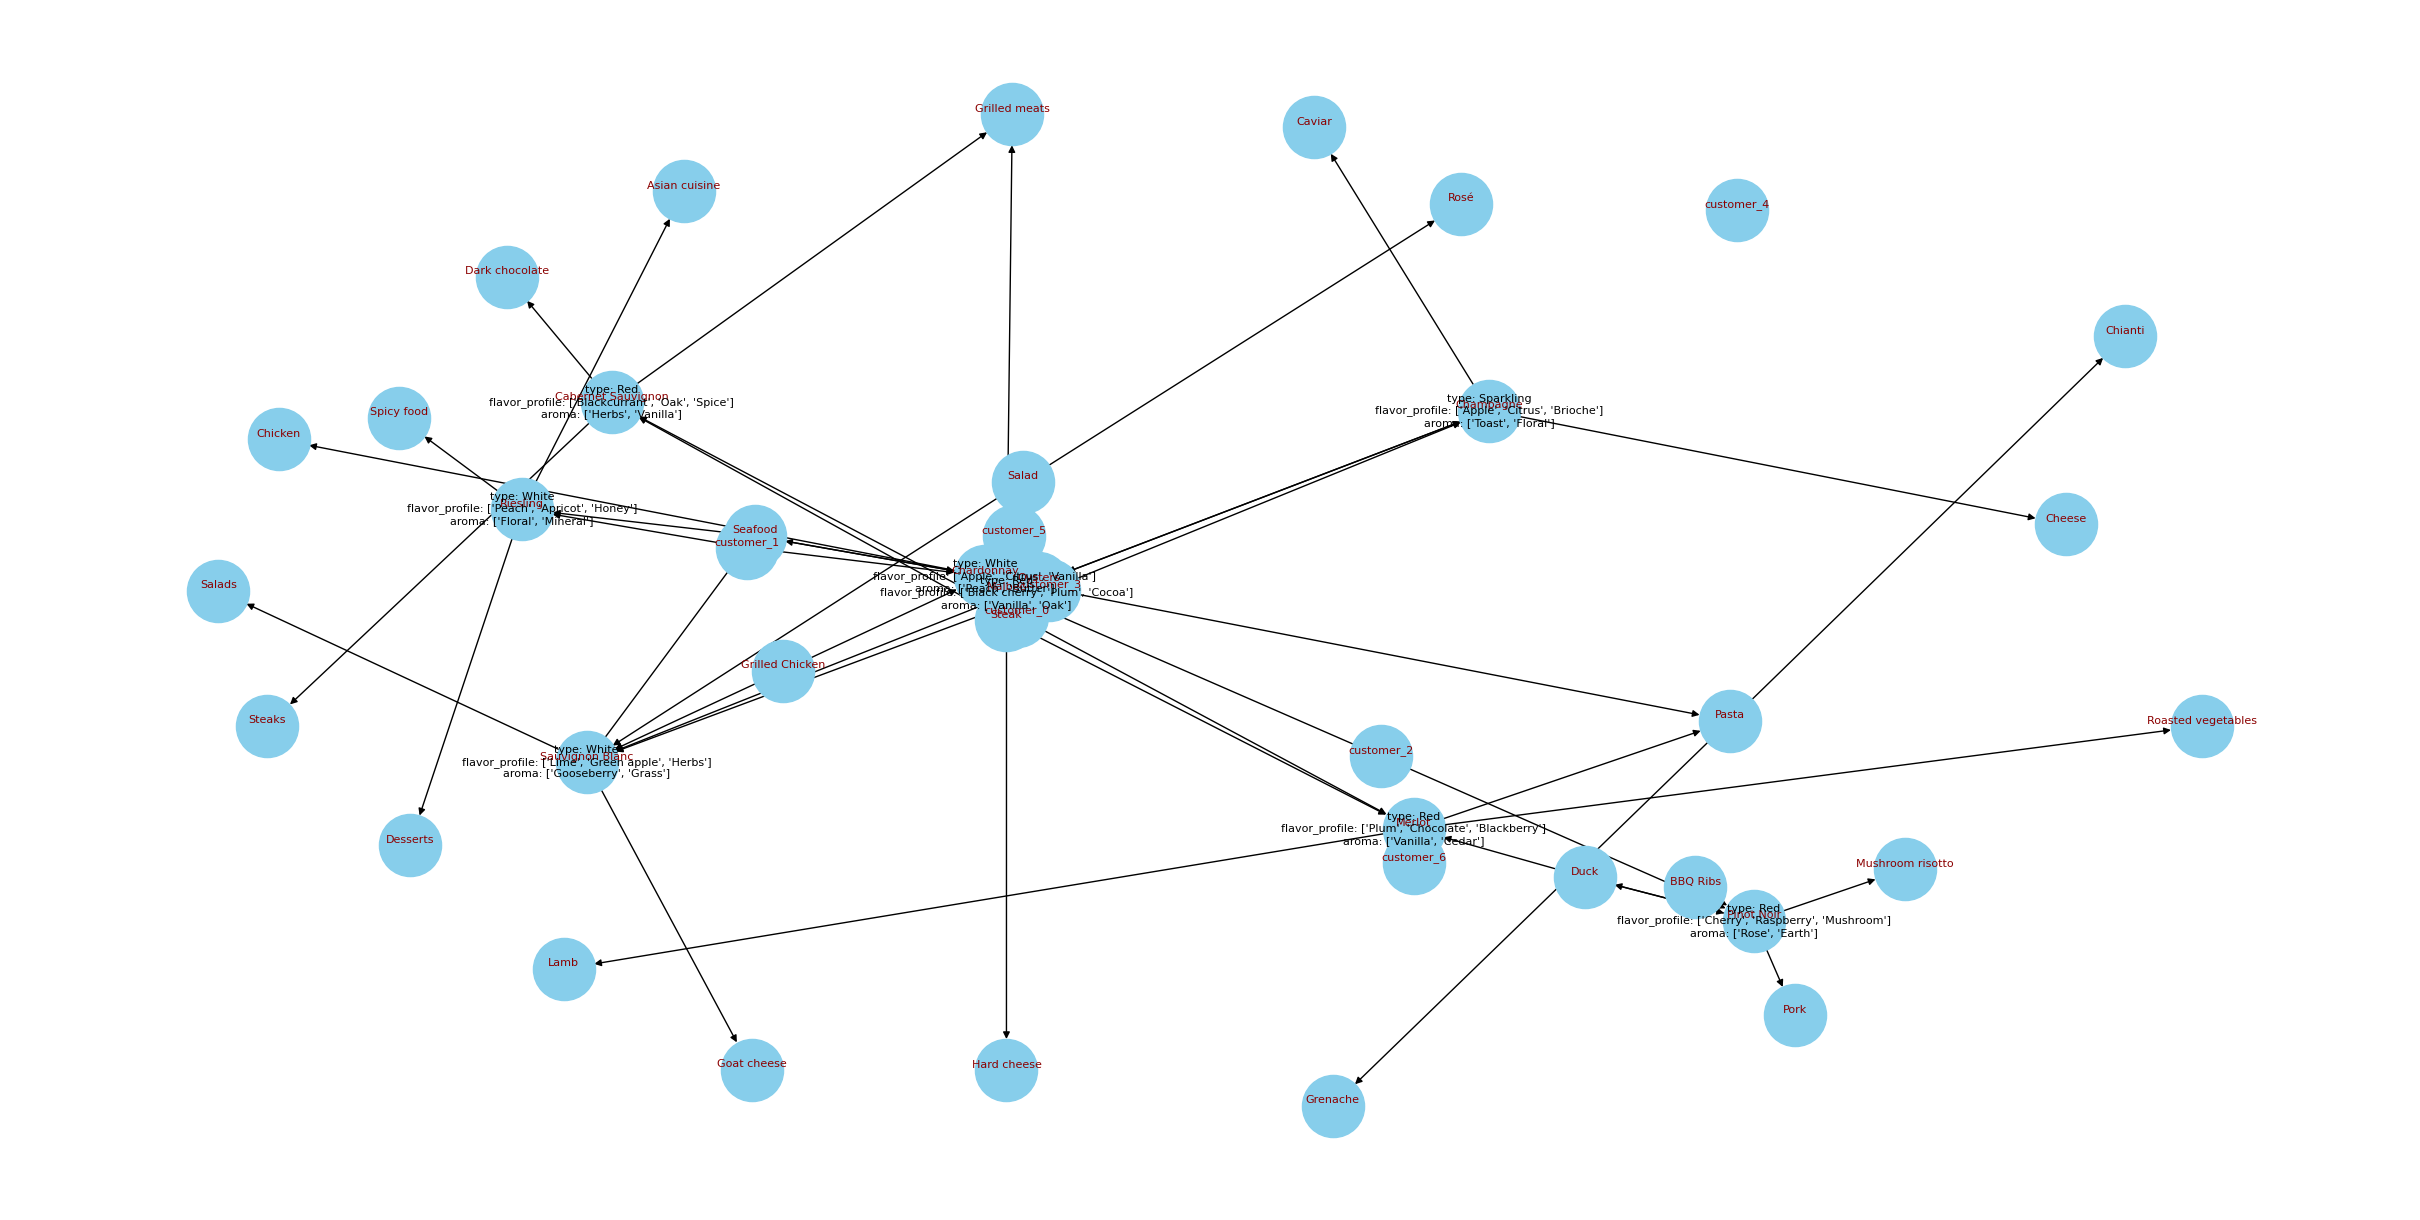

In [65]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
g = nx.DiGraph()

# Adding customers to the graph
for customer_id, details in customer_dict_updated.items():
    attributes = {
        'c_id': customer_id,
        'name': details[0],
        'preferred_wines': details[1]['preferred_wines'],
        'favorite_flavors': details[1]['favorite_flavors'],
        'food_pairing': details[1]['food_pairing'],
    }
    name = "customer_" + str(customer_id)
    g.add_node(name, **attributes)

# Adding wines to the graph
for wine in wine_properties.keys():
    attributes = {
        'name': wine,
        'type': wine_properties[wine]['type'],
        'flavor_profile': wine_properties[wine]['flavor_profile'],
        'aroma': wine_properties[wine]['aroma'],
    }
    g.add_node(wine, **attributes)

# Adding food items to the graph
for food, details in food_items.items():
    attributes = {
        'flavors': details['flavors'],
        'recommended_wines': details['recommended_wines'],
    }
    g.add_node(food, **attributes)

# Adding edges between customers and their preferred wines
for customer_id, details in customer_dict_updated.items():
    customer_name = "customer_" + str(customer_id)
    for wine in details[1]['preferred_wines']:
        g.add_edge(customer_name, wine)

# Adding edges between wines and their recommended food pairings
for wine, details in wine_properties.items():
    for food in details['food_pairing']:
        g.add_edge(wine, food)

# Adding edges between food and recommended wines
for food, details in food_items.items():
    for wine in details['recommended_wines']:
        g.add_edge(food, wine)

# Visualization using Matplotlib and NetworkX
plt.figure(figsize=(24, 12))

# Choose your layout here
pos = nx.spring_layout(g)  # Spring layout
# pos = nx.circular_layout(g)  # Circular layout
# pos = nx.random_layout(g)  # Random layout
# shell = [['customer_1', 'customer_2'], list(wine_properties.keys()), list(food_items.keys())]  # Adjust as needed
# pos = nx.shell_layout(g, nlist=shell)  # Shell layout
# pos = nx.kamada_kaway_layout(g)  # Kamada-Kaway layout
# pos = nx.planar_layout(g)  # Planar layout
# pos = nx.spectral_layout(g)  # Spectral layout
# pos = nx.fruchterman_reingold_layout(g)  # Fruchterman-Reingold layout

# Uncomment the layout you want to use and comment the others above

# Draw the nodes and edges
nx.draw(g, pos, with_labels=False, node_size=2000, node_color='skyblue', 
        font_size=12, font_weight='bold', arrows=True)

# Separate node names (primary labels) and selected attributes
node_names = {n: n for n in g.nodes}  # Node names as labels
node_attrs = {n: "\n".join([f"{k}: {v}" for k, v in g.nodes[n].items() if k in ['type', 'flavor_profile', 'aroma']]) for n in g.nodes}

# Adjust label positions slightly above/below the nodes
offset_pos = {node: (x,  y +0.01) for node, (x, y) in pos.items()}  # Shift names upward

# Draw the node names outside the circles
nx.draw_networkx_labels(g, offset_pos, labels=node_names, font_size=8, font_color='darkred')

# Draw the selected attributes inside the nodes
nx.draw_networkx_labels(g, pos, labels=node_attrs, font_size=8)

# Display the graph
plt.show()


In [76]:
# Add relationships based on preferred wines and favorite flavors
for customer_name, preferences in customer_preferences_updated.items():
    # Preferred wines relationship
    for wine in preferences['preferred_wines']:
        g.add_edge(customer_name, wine, prefers_wine=1)

    # Favorite flavors relationship
    for flavor in preferences['favorite_flavors']:
        g.add_edge(customer_name, flavor, likes_flavor=1)

# Adding wine-related edges to the graph
for wine in wines:
    g.add_edge(wine['name'], wine['type'], wine_type=wine['type'])
    for flavor in wine['flavors']:
        g.add_edge(wine['name'], flavor, has_flavor=1)
    for pairing in wine['food_pairings']:
        g.add_edge(wine['name'], pairing, pairs_with=1)

# Visualization using Matplotlib and NetworkX
plt.figure(figsize=(20, 8))
pos = nx.spring_layout(g)  # Choose a different layout if desired

# Draw the nodes and edges
nx.draw(g, pos, with_labels=False, node_size=2000, node_color='skyblue', 
        font_size=10, font_weight='bold', arrows=True)

# Separate node names (primary labels) and selected attributes
node_names = {n: n for n in g.nodes}  # Node names as labels

# Adjust label positions slightly above/below the nodes
offset_pos = {node: (x + 0.05, y + 0.1) for node, (x, y) in pos.items()}  # Shift names upward

# Draw the node names outside the circles
nx.draw_networkx_labels(g, offset_pos, labels=node_names, font_size=10, font_color='darkred')

# Display the graph
plt.title("Wine Preferences and Flavor Relationships")
plt.axis('off')  # Turn off the axis
plt.show()

TypeError: string indices must be integers, not 'str'

In [75]:
# Creating edges for wine ontology
for wine in wines:
    g.add_edge(wine['name'], wine['type'], wine_type=wine['type'])
    for flavor in wine['flavors']:
        g.add_edge(wine['name'], flavor, has_flavor=1)
    for pairing in wine['food_pairings']:
        g.add_edge(wine['name'], pairing, pairs_with=1)


TypeError: string indices must be integers, not 'str'